## Intro to Baysain Parameter Inference with pymc3 

In [3]:
import pymc4 as pm
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


The goal of Bayeisan parameter inference is to esitmate the probability distributions for underlying parameters from observed data.

First we generate an artificial dataset. The distribution is $\mu=0.5$, $\sigma=0.35$, and we generate 1000 observations.

In [8]:
obs_y = np.random.normal(0.5, 0.35, 100)

We need to have prior probability distributions on the parameters.  Unless we have some prior information on what these should be, we often assume weak or noninformative priors that allow pymc3 to estimate the distribution using repeated iterations using Bayes theorem.

For this example, suppose that we expect the data to come from a normal distribution, but we do not have much information on the parameters.  Our weak priors are then:
1. The standard deviation stdev is a half-normal distribution with standard deviation of 1.
2. The mean mu has a normal distribution with mean 0 and standard deviation 1.

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, stdev]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 68 seconds.
C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


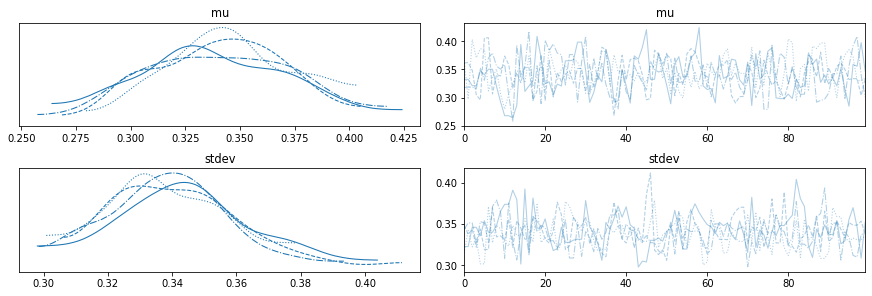

In [11]:
with pm.Model() as exercise1:

    # prior probabilitiy distributions
    stdev = pm.HalfNormal('stdev', sd=0.05)
    mu = pm.Normal('mu', mu=0.0, sd=0.05)

    # The model  - y is a normal distribution with mean mu and standard deviation  stdev.
    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    # Iterate MCMC
    trace = pm.sample(100, cores = 4)

pm.traceplot(trace, ['mu', 'stdev'])
plt.show()